In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
# import streamlit as st
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, date
import matplotlib as mpl

In [4]:
import os
import importlib

In [84]:
page_0 = importlib.import_module('pages.0_CAMELS_Data_Preview')
page_market = importlib.import_module('pages.2_Market_Analysis')
from Data_Upload_and_Information import *

In [85]:
import plotly.io as pio
pio.templates.default = "plotly"

In [86]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [87]:
df_input = pd.read_excel("Data input example FI Rating Model v3.xlsx", sheet_name='Institution_Data')

In [88]:
df_input.head()

,Date,Institution Name,Tier 1 Capital,RWA,Total Liabilities,Total Equity,Stage 1 Exposure,Stage 2 Exposure,Stage 3 Exposure,Total Gross Loans,Total Provisions,Total Assets,Total Assets (t-1),Total Assets (t-2),Total Assets (t-3),Net Income,Net Operating Income,Non Interest Income,Interest Income,Interest Expenses,Expenses,Liquid Assets,Current Liabilities,Liquidity Coverage Ratio (LCR)
0,2023-12-31,Bank 1,114655.232432,4.409817e+05,1.822883e+06,382025.199,1.591062e+06,1.988827e+05,18080.248191,1.808025e+06,126561.737338,2.204908e+06,2.116712e+06,1.841539e+06,1.767878e+06,19154.448,98933.026,27142.253,78642.470,6289.030,12121.070,3.853210e+05,1.421849e+06,2.10
1,2023-12-31,Bank 2,60985.859560,2.102961e+05,5.358907e+05,64955.207,4.187896e+05,5.617909e+04,35750.331466,5.107190e+05,10214.380419,6.008459e+05,6.248797e+05,5.436454e+05,5.599547e+05,8187.466,21370.500,4742.416,19385.950,2535.933,4177.531,2.134989e+05,4.287126e+05,2.63
2,2023-12-31,Bank 3,32077.751613,1.283110e+05,2.057381e+05,27554.630,1.510337e+05,3.485394e+04,7745.318935,1.936330e+05,13554.308136,2.332927e+05,2.332927e+05,1.936330e+05,1.916966e+05,4100.385,13377.922,2122.634,14063.128,2849.372,3371.272,4.621701e+04,1.604757e+05,1.82
3,2023-12-31,Bank 4,44753.646787,1.721294e+05,2.186886e+05,20380.020,1.950800e+05,2.524565e+04,9180.235238,2.295059e+05,25245.646906,2.390686e+05,2.223338e+05,1.867604e+05,1.848928e+05,2468.747,11740.269,2051.748,9581.170,541.028,1017.423,7.358653e+04,1.683902e+05,1.71
4,2023-12-31,Bank 5,811349.797356,4.507499e+06,1.187849e+07,1378856.305,7.758201e+06,2.115873e+06,201511.714376,1.007559e+07,403023.428752,1.325735e+07,1.087103e+07,9.457793e+06,8.890326e+06,219215.296,443464.264,124649.617,440750.096,87469.169,125191.658,5.946968e+06,1.009672e+07,2.77


In [89]:
# Get CAMELS data and calculate Benchmark
date_inp = np.datetime64('2020-12-31T00:00:00.000000000')
df_bench_camels = page_market.benchmark_dataframe_camels(df_input, date_inp)
df_bench_totals = page_market.benchmark_dataframe_totals(df_input, date_inp)
df_bench = pd.concat([df_bench_totals, df_bench_camels], axis=1)
df_out = page_market.df_var2(df_input, date_inp)
df_tot_sum = pd.concat([df_bench, df_out], axis=0)
df_tot_sum.index.name = "Institution Name"
df_tot_market = page_market.market_analysis_dataframe(df_tot_sum)

2024-10-03 12:33:09.390 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:09.391 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:09.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:09.405 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:09.407 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:09.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:09.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:09.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [90]:
df_bins = exp_bins.copy(deep=True)

In [91]:
page_market.styler_rel(df_tot_market, df_bins)

2024-10-03 12:33:09.673 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:09.675 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:09.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:09.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:09.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


,Total Assets Market Share,Total Gross Loans Market Share,Tier 1 Capital Ratio Difference,Debt to Equity Ratio Difference,NPL to Total Gross Loans Ratio Difference,Loan Loss Provision Rate Difference,Asset Growth Rate 3Y Average Difference,Efficiency Ratio Difference,Return on Assets (ROA) Difference,Interest Expenses to Interest Income Ratio Difference,Liquidity Coverage Ratio (LCR) Difference,Cash Ratio Difference,Non Interest Income Share Difference
Institution Name,,,,,,,,,,,,,
Bank 1,2.83%,2.60%,35.49%,-32.67%,65.31%,-7.86%,-35.61%,-47.62%,-51.84%,-60.89%,23.39%,16.57%,23.78%
Bank 2,0.90%,0.88%,16.68%,23.73%,28.57%,-78.51%,-21.05%,-30.52%,-38.77%,-20.58%,21.30%,-62.23%,-3.17%
Bank 3,0.31%,0.33%,33.46%,-5.99%,10.20%,-27.53%,-84.38%,-0.49%,-19.13%,1.26%,-11.40%,-48.39%,-43.46%
Bank 4,0.30%,0.36%,16.74%,76.41%,-63.27%,38.77%,12.99%,-66.46%,-48.32%,-77.83%,-15.14%,-43.60%,-17.51%
Bank 5,14.21%,15.64%,8.61%,13.25%,28.57%,-46.34%,37.21%,-23.21%,11.29%,24.66%,31.80%,-36.30%,9.80%
Bank 6,9.47%,8.47%,-10.80%,47.49%,-8.16%,73.64%,-28.20%,28.18%,-40.79%,-24.35%,-26.62%,-46.62%,22.25%
Bank 7,0.29%,0.24%,39.91%,11.48%,-26.53%,-22.11%,-32.62%,-30.44%,-89.56%,-35.09%,-17.01%,19.60%,-56.98%
Bank 8,0.92%,0.98%,-18.93%,54.88%,-81.63%,64.78%,4.48%,-80.47%,-31.77%,-83.15%,-9.11%,33.19%,2.21%
Bank 9,0.08%,0.10%,-45.20%,-22.77%,-26.53%,-6.59%,-98.88%,-38.33%,-221.77%,-38.34%,-27.50%,-66.26%,-63.52%


In [92]:
pd.DataFrame(df_tot_sum.loc["Benchmark values", :]).T.style.format('{:.2%}').format('{:,.2f}', subset=['Total Assets', 'Total Gross Loans'])

,Total Assets,Total Gross Loans,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Benchmark values,"62,561,986.65","51,190,080.64",20.71%,679.79%,5.44%,9.01%,11.05%,27.45%,2.17%,19.55%,168.56%,39.72%,23.08%


In [93]:
page_market.styler_abs(df_tot_sum.drop(index="Benchmark values"), df_bins)

2024-10-03 12:33:10.220 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:10.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:10.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:10.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-03 12:33:10.242 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


,Total Assets,Total Gross Loans,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,,
Bank 1,"1,767,877.85","1,330,373.59",28.06%,457.69%,9.00%,8.30%,7.11%,14.38%,1.05%,7.65%,208.00%,46.30%,28.57%
Bank 2,"559,954.74","451,705.44",24.17%,841.12%,7.00%,1.94%,8.72%,19.07%,1.33%,15.52%,204.48%,15.00%,22.35%
Bank 3,"191,696.64","167,726.82",27.64%,639.08%,6.00%,6.53%,1.73%,27.32%,1.75%,19.79%,149.35%,20.50%,13.05%
Bank 4,"184,892.81","182,281.83",24.18%,1199.22%,2.00%,12.50%,12.48%,9.21%,1.12%,4.33%,143.05%,22.40%,19.04%
Bank 5,"8,890,325.63","8,004,347.56",22.49%,769.89%,7.00%,4.84%,15.16%,21.08%,2.42%,24.37%,222.16%,25.30%,25.34%
Bank 6,"5,926,082.87","4,335,027.03",18.47%,1002.62%,5.00%,15.65%,7.93%,35.19%,1.28%,14.79%,123.70%,21.20%,28.21%
Bank 7,"182,153.52","122,758.46",28.98%,757.85%,4.00%,7.02%,7.45%,19.09%,0.23%,12.69%,139.90%,47.50%,9.93%
Bank 8,"574,317.85","501,966.28",16.79%,1052.85%,1.00%,14.85%,11.54%,5.36%,1.48%,3.29%,153.20%,52.90%,23.59%
Bank 9,"51,400.54","51,724.52",11.35%,524.99%,4.00%,8.42%,0.12%,16.93%,-2.64%,12.05%,122.21%,13.40%,8.42%


In [94]:
def plot_variable(df, sel_var):
    n_colors = df.shape[0]
    color_scale = px.colors.sample_colorscale("bluered", [n/(n_colors-1) for n in range(n_colors)])
    df_sort = df.sort_values(sel_var)
    pos_bench = df_sort.index.values.tolist().index('Benchmark values')
    # color_scale[pos_bench] = 'rgb(125, 200, 126)'
    color_scale[pos_bench] = 'rgb(125, 200, 126)'
    # color_scale[pos_bench-1] = 'rgb(125, 200, 126)'
    # 'rgb(125, 200, 126)'
    fig = px.bar(data_frame=df_sort.reset_index(), 
            y='Institution Name', x=sel_var, color = sel_var, color_discrete_sequence=color_scale, orientation='h')
    return fig.show()

In [95]:
df_tot_sum.columns[2:]

Index(['Tier 1 Capital Ratio', 'Debt to Equity Ratio',
       'NPL to Total Gross Loans Ratio', 'Loan Loss Provision Rate',
       'Asset Growth Rate 3Y Average', 'Efficiency Ratio',
       'Return on Assets (ROA)', 'Interest Expenses to Interest Income Ratio',
       'Liquidity Coverage Ratio (LCR)', 'Cash Ratio',
       'Non Interest Income Share'],
      dtype='object')

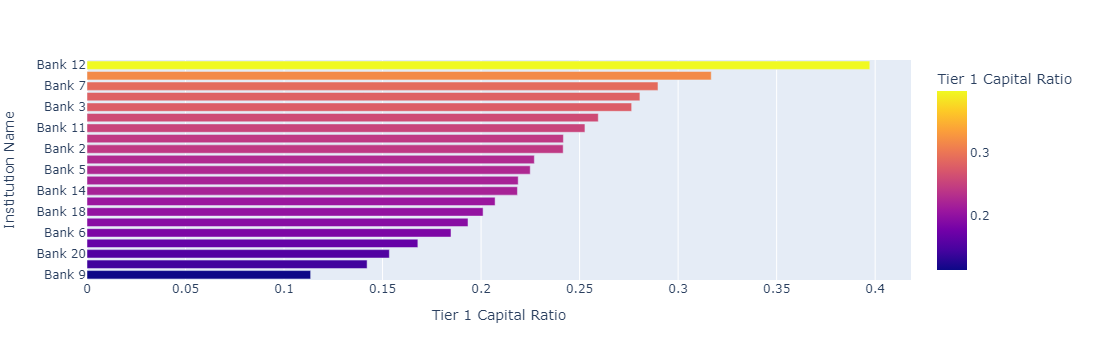

In [96]:
select_var = 'Tier 1 Capital Ratio'
plot_variable(df_tot_sum, select_var)

In [97]:
df_tot_sum

,Total Assets,Total Gross Loans,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,,
Benchmark values,6.256199e+07,5.119008e+07,0.207114,6.797931,0.054444,0.090103,0.110489,0.274508,0.021702,0.195475,1.685650,0.397172,0.230788
Bank 1,1.767878e+06,1.330374e+06,0.280611,4.576870,0.090000,0.083023,0.071140,0.143791,0.010452,0.076455,2.080000,0.463000,0.285671
Bank 2,5.599547e+05,4.517054e+05,0.241667,8.411159,0.070000,0.019360,0.087231,0.190726,0.013288,0.155242,2.044772,0.150000,0.223473
Bank 3,1.916966e+05,1.677268e+05,0.276420,6.390785,0.060000,0.065297,0.017256,0.273176,0.017550,0.197935,1.493528,0.205000,0.130495
Bank 4,1.848928e+05,1.822818e+05,0.241775,11.992171,0.020000,0.125033,0.124846,0.092077,0.011216,0.043341,1.430463,0.224000,0.190388
Bank 5,8.890326e+06,8.004348e+06,0.224941,7.698938,0.070000,0.048352,0.151606,0.210791,0.024152,0.243674,2.221629,0.253000,0.253415
Bank 6,5.926083e+06,4.335027e+06,0.184737,10.026210,0.050000,0.156457,0.079333,0.351869,0.012850,0.147868,1.237005,0.212000,0.282141
Bank 7,1.821535e+05,1.227585e+05,0.289780,7.578483,0.040000,0.070181,0.074452,0.190943,0.002266,0.126876,1.398989,0.475000,0.099294
Bank 8,5.743178e+05,5.019663e+05,0.167915,10.528460,0.010000,0.148468,0.115435,0.053623,0.014807,0.032930,1.532045,0.529000,0.235894


## From Data Upload and Information

In [9]:
def loan_loss_provision_market(df):

    df_group = df[['Date', 'Total Provisions','Total Gross Loans']].groupby(by='Date',sort=False).sum()
    df_group['Market Loan Loss Rate'] = df_group['Total Provisions']/df_group['Total Gross Loans']
    df_group = df_group.reset_index()

    return df_group

def df_var(df):

    # Merging Loan Loss Providion market and Input Data
    df_all = pd.merge(df,loan_loss_provision_market(df),how='inner',on='Date')
    df_all = df_all.set_index('Institution Name')
    df_all = df_all.drop(columns=['Total Provisions_y','Total Gross Loans_y'])
    df_all = df_all.rename(columns={'Total Provisions_x':'Total Provisions','Total Gross Loans_x':'Total Gross Loans'})

    # Capital Adequacy
    df_all['Tier 1 Capital Ratio'] = df_all['Tier 1 Capital'] / df_all['RWA']
    df_all['Debt to Equity Ratio'] = df_all['Total Liabilities'] / df_all['Total Equity']

    # Asset Quality
    df_all['NPL to Total Gross Loans Ratio'] = df_all['Stage 3 Exposure'] / df_all['Total Gross Loans']
    df_all['Loan Loss Provision Rate'] = df_all['Total Provisions'] / df_all['Total Gross Loans']
    df_all['Loan Loss Provision Rate Scaled'] = abs(df_all['Loan Loss Provision Rate']-df_all['Market Loan Loss Rate'])

    # Management Quality
    df_all['Asset Growth Rate'] = (df_all['Total Assets'] - df_all['Total Assets (t-1)']) / df_all['Total Assets (t-1)']
    df_all['Asset Growth Rate (t-1)'] = (df_all['Total Assets (t-1)'] - df_all['Total Assets (t-2)']) / df_all['Total Assets (t-2)']
    df_all['Asset Growth Rate (t-2)'] = (df_all['Total Assets (t-2)'] - df_all['Total Assets (t-3)']) / df_all['Total Assets (t-3)']
    df_all['Asset Growth Rate 3Y Average'] = df_all[['Asset Growth Rate', 'Asset Growth Rate (t-1)', 'Asset Growth Rate (t-2)']].mean(axis=1)
    df_all['Efficiency Ratio'] = df_all['Expenses'] / df_all['Net Operating Income']

    # Earnings
    df_all['Return on Assets (ROA)'] = df_all['Net Income'] / ((df_all['Total Assets'] + df_all['Total Assets (t-1)']) / 2)
    df_all['Interest Expenses to Interest Income Ratio'] = df_all['Interest Expenses'] / df_all['Interest Income']

    # Liquidity
    df_all['Cash Ratio'] = df_all['Liquid Assets'] / df_all['Current Liabilities']

    # Sensitivity
    df_all['Non Interest Income Share'] = df_all['Non Interest Income'] / (df_all['Non Interest Income'] + df_all['Interest Income'])

    # Select CAMELS Variables
    df_final_var = df_all[[
        'Date','Tier 1 Capital Ratio','Debt to Equity Ratio','NPL to Total Gross Loans Ratio','Loan Loss Provision Rate Scaled',
        'Asset Growth Rate 3Y Average','Efficiency Ratio','Return on Assets (ROA)','Interest Expenses to Interest Income Ratio',
        'Liquidity Coverage Ratio (LCR)','Cash Ratio','Non Interest Income Share'
    ]]

    return df_final_var


def assign_rating_variable(df_final, cvar, bins_dict):
    # Extract thresholds from bins Dict
    thr1 = bins_dict[cvar][2]
    thr2 = bins_dict[cvar][3]
    thr3 = bins_dict[cvar][4]
    thr4 = bins_dict[cvar][5]
    
    cond = [(df_final[cvar]<=thr1),
            (df_final[cvar]>thr1) & (df_final[cvar]<=thr2),
            (df_final[cvar]>thr2) & (df_final[cvar]<=thr3),
            (df_final[cvar]>thr3) & (df_final[cvar]<=thr4),
            (df_final[cvar]>thr4),
            (df_final[cvar].isnull())] # assign worst score (5) if data is missing
    # Check the variables interpretation, is a higher value better or worse?
    if bins_dict[cvar][1]:
        choice = [5,4,3,2,1,5]
    else:
        choice = [1,2,3,4,5,5]
    return cond, choice


def create_df_ratings(df_final, bins_dict):

    df_ratings = df_final.copy(deep=True)

    # Extract numeric subratings
    for camels_var in df_final.columns[1:]:
        cond_tier1, choice_tier1 = assign_rating_variable(df_final, camels_var, bins_dict)
        df_ratings[camels_var] = np.select(cond_tier1, choice_tier1)

    # Composite Final Numeric Rating
    df_ratings['Composite Final Score'] = (df_ratings.iloc[:,1:]*camels_weights.values).sum(axis=1)

    # Final Rating Score 10 categories (+- added)
    cond_final_rating = [
        (df_ratings['Composite Final Score']>=1) & (df_ratings['Composite Final Score']<1.25), # A+
        (df_ratings['Composite Final Score']>=1.25) & (df_ratings['Composite Final Score']<1.5), # A-
            
        (df_ratings['Composite Final Score']>=1.5) & (df_ratings['Composite Final Score']<1.95), # B+
        (df_ratings['Composite Final Score']>=1.95) & (df_ratings['Composite Final Score']<2.4), # B-
            
        (df_ratings['Composite Final Score']>=2.4) & (df_ratings['Composite Final Score']<2.9), # C+
        (df_ratings['Composite Final Score']>=2.9) & (df_ratings['Composite Final Score']<3.4), # C-
            
        (df_ratings['Composite Final Score']>=3.4) & (df_ratings['Composite Final Score']<3.9), # D+
        (df_ratings['Composite Final Score']>=3.9) & (df_ratings['Composite Final Score']<4.5), # D-
            
        (df_ratings['Composite Final Score']>=4.5) & (df_ratings['Composite Final Score']<4.75), # E+
        (df_ratings['Composite Final Score']>=4.75) & (df_ratings['Composite Final Score']<=5), # E-
        
        (df_ratings['Composite Final Score'].isnull()) # assign E- score if data is missing
    ] 

    # Composite Final Qualitative Rating
    choice_final_rating =['A+','A-','B+','B-','C+','C-','D+','D-','E+','E-','E-']
    df_ratings['Final Rating'] = np.select(cond_final_rating, choice_final_rating)

    # Column reorder
    df_ratings_column_order = [
        'Date','Final Rating','Composite Final Score',
        'Tier 1 Capital Ratio','Debt to Equity Ratio',
        'NPL to Total Gross Loans Ratio','Loan Loss Provision Rate Scaled',
        'Asset Growth Rate 3Y Average','Efficiency Ratio',
        'Return on Assets (ROA)','Interest Expenses to Interest Income Ratio', 
        'Liquidity Coverage Ratio (LCR)','Cash Ratio',
        'Non Interest Income Share'
    ]
        
    df_ratings = df_ratings.reindex(columns=df_ratings_column_order)

    return df_ratings


# Hard-coded bins for variables
bins_dict = {'Tier 1 Capital Ratio':       ['expert', True, 0.06, 0.1, 0.14, 0.2], 
        'Debt to Equity Ratio':            ['expert', False, 6, 8, 10, 12],
        'NPL to Total Gross Loans Ratio':  ['expert', False, 0.04, 0.08, 0.12, 0.16],
        'Loan Loss Provision Rate Scaled': ['expert', False, 0.02, 0.04, 0.06, 0.08],
        'Asset Growth Rate 3Y Average':    ['expert', True, -0.03, 0, 0.03, 0.06],
        'Efficiency Ratio':                ['expert', False, 0.5, 0.7, 0.9, 1.1],
        'Return on Assets (ROA)':          ['expert', True, -0.002, 0.001, 0.005, 0.01],
        'Interest Expenses to Interest Income Ratio': ['expert', False,  0.07, 0.14, 0.21, 0.28],
        'Liquidity Coverage Ratio (LCR)':  ['expert', True,  1, 1.35, 1.7, 2],
        'Cash Ratio':                      ['expert', True,  0.075, 0.15, 0.225, 0.3],
        'Non Interest Income Share':       ['expert', True,  0.1, 0.2, 0.3, 0.4]}
exp_bins = pd.DataFrame(bins_dict, index=['Binning Method', 'Reverse', '1st_Threshold', '2nd_Threshold', '3rd_Threshold', '4th_Threshold']).T

# Variables Weights
camels_weights = pd.DataFrame({
    'Tier 1 Capital Ratio': 0.09,
    'Debt to Equity Ratio': 0.10,
    'NPL to Total Gross Loans Ratio': 0.15,
    'Loan Loss Provision Rate Scaled': 0.11,
    'Asset Growth Rate 3Y Average': 0.09,
    'Efficiency Ratio': 0.1,
    'Return on Assets (ROA)': 0.1,
    'Interest Expenses to Interest Income Ratio': 0.06, 
    'Liquidity Coverage Ratio (LCR)': 0.01,
    'Cash Ratio': 0.07,
    'Non Interest Income Share': 0.12}, 
    index = ['Weight']
)

In [18]:
df_input = pd.read_excel("Data input example FI Rating Model v3.xlsx", sheet_name='Institution_Data')
df_final = df_var(df_input)
df_ratings = create_df_ratings(df_final, bins_dict)

df_input['Date'] = pd.to_datetime(df_input['Date']).dt.strftime('%d-%m-%Y')
df_final['Date'] = pd.to_datetime(df_final['Date']).dt.strftime('%d-%m-%Y')
df_ratings['Date'] = pd.to_datetime(df_ratings['Date']).dt.strftime('%d-%m-%Y')

In [19]:
df_final

,Date,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate Scaled,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,
Bank 1,31-12-2023,0.260000,4.771631,0.01,0.017149,0.077586,0.122518,0.008864,0.079970,2.100000,0.271,0.256580
Bank 2,31-12-2023,0.290000,8.250158,0.07,0.067149,0.027279,0.195481,0.013359,0.130813,2.630000,0.498,0.196549
Bank 3,31-12-2023,0.250000,7.466553,0.04,0.017149,0.071640,0.252003,0.017576,0.202613,1.820000,0.288,0.131142
Bank 4,31-12-2023,0.260000,10.730539,0.04,0.022851,0.091949,0.086661,0.010701,0.056468,1.710000,0.437,0.176374
Bank 5,31-12-2023,0.180000,8.614743,0.02,0.047149,0.144256,0.282304,0.018171,0.198455,2.770000,0.589,0.220463
...,...,...,...,...,...,...,...,...,...,...,...,...
Bank 16,31-12-2020,0.193366,11.279307,0.08,0.024327,0.204819,0.470461,0.016195,0.256769,2.177824,0.193,0.262243
Bank 17,31-12-2020,0.227023,9.261112,0.06,0.070456,0.130351,0.101252,0.008757,0.015350,0.959716,0.177,0.179745
Bank 18,31-12-2020,0.201020,9.036094,0.07,0.019893,0.118535,0.120528,0.004258,0.090698,2.053496,0.207,0.176716


In [20]:
df_ratings

,Date,Final Rating,Composite Final Score,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate Scaled,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,,,
Bank 1,31-12-2023,A-,1.47,1,1,1,1,1,1,2,2,1,2,3
Bank 2,31-12-2023,B-,2.28,1,3,2,4,3,1,1,2,1,1,4
Bank 3,31-12-2023,B+,1.66,1,2,1,1,1,1,1,3,2,2,4
Bank 4,31-12-2023,B+,1.78,1,4,1,2,1,1,1,1,2,1,4
Bank 5,31-12-2023,B+,1.87,2,3,1,3,1,1,1,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bank 16,31-12-2020,B-,2.21,2,4,2,2,1,1,1,4,1,3,3
Bank 17,31-12-2020,B-,2.32,1,3,2,4,1,1,2,1,5,3,4
Bank 18,31-12-2020,B-,2.11,1,3,2,1,1,1,3,2,1,3,4


In [54]:
df_final.columns.to_list().index('Debt to Equity Ratio')

2

In [55]:
df_final.columns

Index(['Date', 'Tier 1 Capital Ratio', 'Debt to Equity Ratio',
       'NPL to Total Gross Loans Ratio', 'Loan Loss Provision Rate Scaled',
       'Asset Growth Rate 3Y Average', 'Efficiency Ratio',
       'Return on Assets (ROA)', 'Interest Expenses to Interest Income Ratio',
       'Liquidity Coverage Ratio (LCR)', 'Cash Ratio',
       'Non Interest Income Share'],
      dtype='object')

In [45]:
df_final.columns[1:].to_list()

['Tier 1 Capital Ratio',
 'Debt to Equity Ratio',
 'NPL to Total Gross Loans Ratio',
 'Loan Loss Provision Rate Scaled',
 'Asset Growth Rate 3Y Average',
 'Efficiency Ratio',
 'Return on Assets (ROA)',
 'Interest Expenses to Interest Income Ratio',
 'Liquidity Coverage Ratio (LCR)',
 'Cash Ratio',
 'Non Interest Income Share']

In [39]:
df_final.iloc[0:2].index.to_list()

['Bank 1', 'Bank 2']

In [21]:
df_final.head()

,Date,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate Scaled,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,
Bank 1,31-12-2023,0.26,4.771631,0.01,0.017149,0.077586,0.122518,0.008864,0.079970,2.10,0.271,0.256580
Bank 2,31-12-2023,0.29,8.250158,0.07,0.067149,0.027279,0.195481,0.013359,0.130813,2.63,0.498,0.196549
Bank 3,31-12-2023,0.25,7.466553,0.04,0.017149,0.071640,0.252003,0.017576,0.202613,1.82,0.288,0.131142
Bank 4,31-12-2023,0.26,10.730539,0.04,0.022851,0.091949,0.086661,0.010701,0.056468,1.71,0.437,0.176374
Bank 5,31-12-2023,0.18,8.614743,0.02,0.047149,0.144256,0.282304,0.018171,0.198455,2.77,0.589,0.220463


In [22]:
df_final.loc[['Bank 1', 'Bank 2']]

,Date,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate Scaled,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,
Bank 1,31-12-2023,0.260000,4.771631,0.01,0.017149,0.077586,0.122518,0.008864,0.079970,2.100000,0.271,0.256580
Bank 1,31-12-2022,0.262857,5.160019,0.05,0.022552,0.060397,0.130256,0.009586,0.077244,2.134000,0.412,0.279682
Bank 1,31-12-2021,0.299113,4.528180,0.09,0.003497,0.039574,0.139344,0.009809,0.076455,2.010000,0.176,0.273462
Bank 1,31-12-2020,0.280611,4.576870,0.09,0.007079,0.071140,0.143791,0.010452,0.076455,2.080000,0.463,0.285671
Bank 2,31-12-2023,0.290000,8.250158,0.07,0.067149,0.027279,0.195481,0.013359,0.130813,2.630000,0.498,0.196549
Bank 2,31-12-2022,0.258725,7.801780,0.01,0.071168,0.094363,0.186793,0.012332,0.129436,2.498500,0.355,0.189845
Bank 2,31-12-2021,0.258725,8.495271,0.06,0.065417,0.077522,0.186793,0.012796,0.148342,2.198680,0.504,0.198394
Bank 2,31-12-2020,0.241667,8.411159,0.07,0.070743,0.087231,0.190726,0.013288,0.155242,2.044772,0.150,0.223473


In [23]:
px.bar(data_frame=df_tot_sum.reset_index().sort_values('Debt to Equity Ratio'), 
       x='Institution Name', y='Debt to Equity Ratio', color = 'Debt to Equity Ratio', color_continuous_scale=color_scale_g)

NameError: name 'df_tot_sum' is not defined

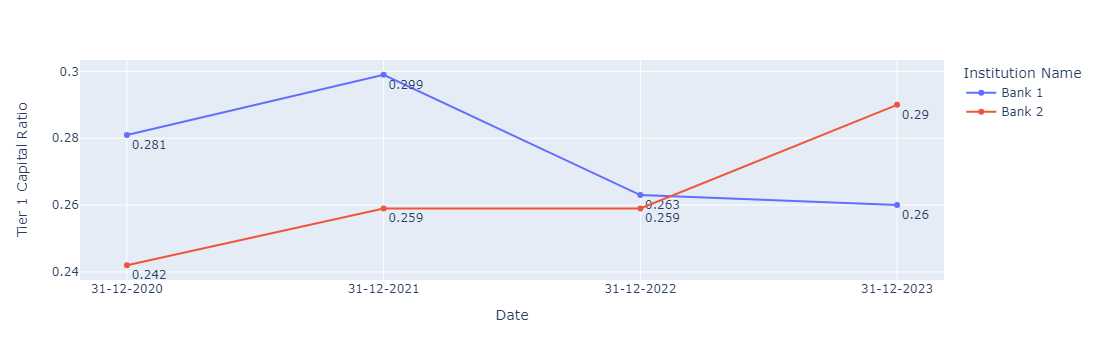

In [69]:
fig = px.line(round(df_final.loc[['Bank 1', 'Bank 2']].reset_index().sort_values('Date'), 3), x='Date', y='Tier 1 Capital Ratio', color='Institution Name',
       text='Tier 1 Capital Ratio')
fig.update_traces(textposition="bottom right")

In [ ]:
fig = px.line(df, x="lifeExp", y="gdpPercap", color="country", text="year")
fig.update_traces(textposition="bottom right")

In [73]:
df_final.columns

Index(['Date', 'Tier 1 Capital Ratio', 'Debt to Equity Ratio',
       'NPL to Total Gross Loans Ratio', 'Loan Loss Provision Rate Scaled',
       'Asset Growth Rate 3Y Average', 'Efficiency Ratio',
       'Return on Assets (ROA)', 'Interest Expenses to Interest Income Ratio',
       'Liquidity Coverage Ratio (LCR)', 'Cash Ratio',
       'Non Interest Income Share'],
      dtype='object')

In [74]:
df_final_cp = df_final.copy(deep=True)

In [75]:
df_final_cp.columns = ['Date', 'Variable 1', 'Variable 2',
                       'Variable 3', 'Variable 4',
                       'Variable 5', 'Variable 6',
                       'Variable 7', 'Variable 8',
                       'Variable 9', 'Variable 10',
                       'Variable 11']

In [76]:
df_final_cp

,Date,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,Variable 10,Variable 11
Institution Name,,,,,,,,,,,,
Bank 1,31-12-2023,0.260000,4.771631,0.01,0.017149,0.077586,0.122518,0.008864,0.079970,2.100000,0.271,0.256580
Bank 2,31-12-2023,0.290000,8.250158,0.07,0.067149,0.027279,0.195481,0.013359,0.130813,2.630000,0.498,0.196549
Bank 3,31-12-2023,0.250000,7.466553,0.04,0.017149,0.071640,0.252003,0.017576,0.202613,1.820000,0.288,0.131142
Bank 4,31-12-2023,0.260000,10.730539,0.04,0.022851,0.091949,0.086661,0.010701,0.056468,1.710000,0.437,0.176374
Bank 5,31-12-2023,0.180000,8.614743,0.02,0.047149,0.144256,0.282304,0.018171,0.198455,2.770000,0.589,0.220463
...,...,...,...,...,...,...,...,...,...,...,...,...
Bank 16,31-12-2020,0.193366,11.279307,0.08,0.024327,0.204819,0.470461,0.016195,0.256769,2.177824,0.193,0.262243
Bank 17,31-12-2020,0.227023,9.261112,0.06,0.070456,0.130351,0.101252,0.008757,0.015350,0.959716,0.177,0.179745
Bank 18,31-12-2020,0.201020,9.036094,0.07,0.019893,0.118535,0.120528,0.004258,0.090698,2.053496,0.207,0.176716


In [77]:
df_ratings

,Date,Final Rating,Composite Final Score,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate Scaled,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,,,
Bank 1,31-12-2023,A-,1.47,1,1,1,1,1,1,2,2,1,2,3
Bank 2,31-12-2023,B-,2.28,1,3,2,4,3,1,1,2,1,1,4
Bank 3,31-12-2023,B+,1.66,1,2,1,1,1,1,1,3,2,2,4
Bank 4,31-12-2023,B+,1.78,1,4,1,2,1,1,1,1,2,1,4
Bank 5,31-12-2023,B+,1.87,2,3,1,3,1,1,1,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bank 16,31-12-2020,B-,2.21,2,4,2,2,1,1,1,4,1,3,3
Bank 17,31-12-2020,B-,2.32,1,3,2,4,1,1,2,1,5,3,4
Bank 18,31-12-2020,B-,2.11,1,3,2,1,1,1,3,2,1,3,4


### Correlations

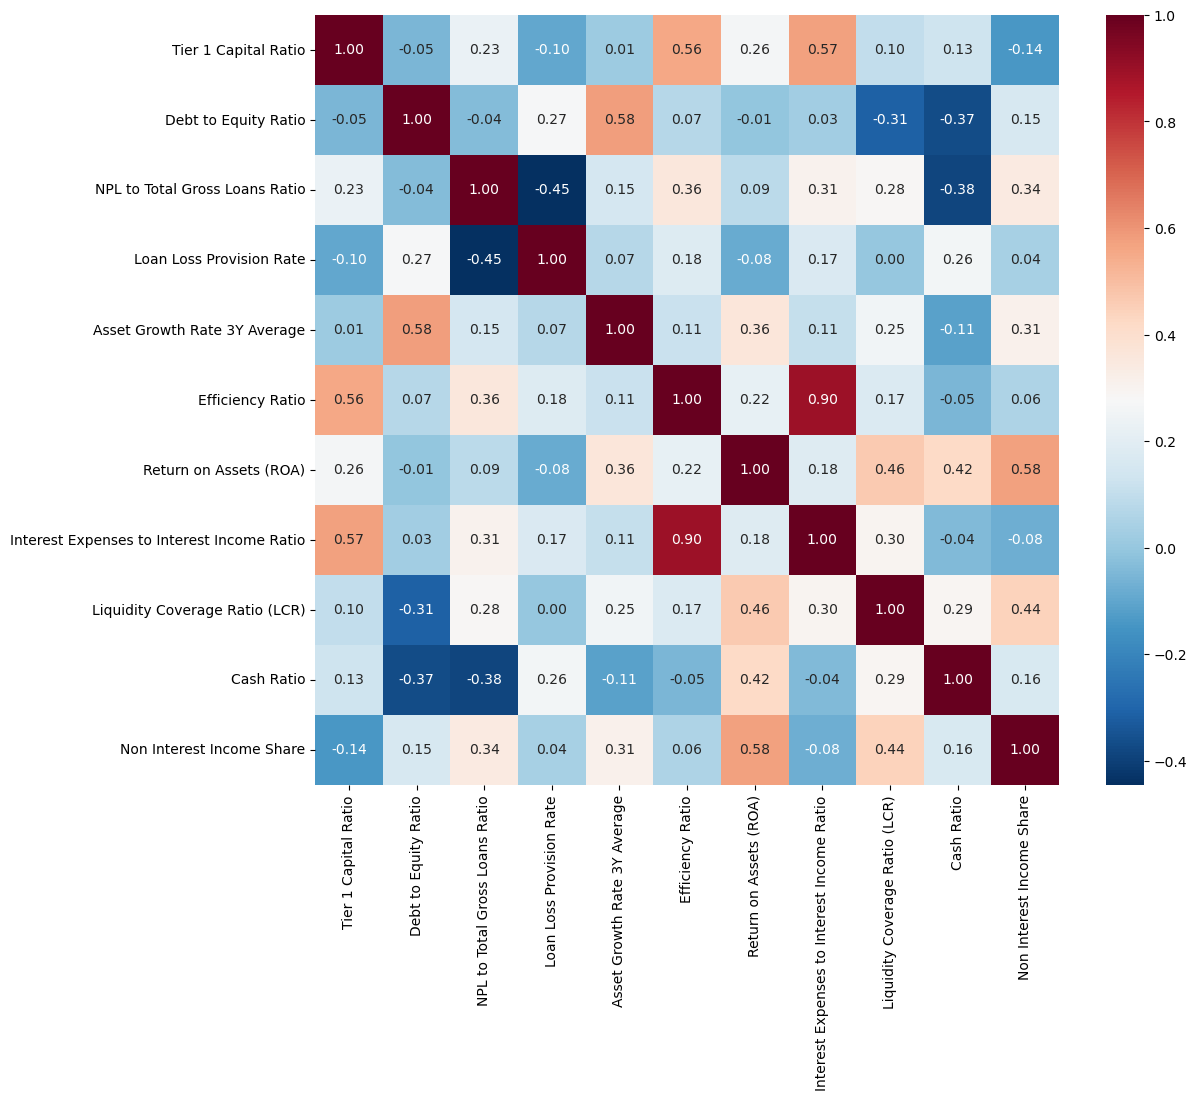

In [61]:
fig = plt.figure(figsize=(12, 10))
fig = sns.heatmap(df_tot_sum.drop(['Benchmark values'], axis=0).drop(['Total Assets', 'Total Gross Loans'], axis=1).corr(), 
            cmap='RdBu_r', annot=True, fmt=".2f", )

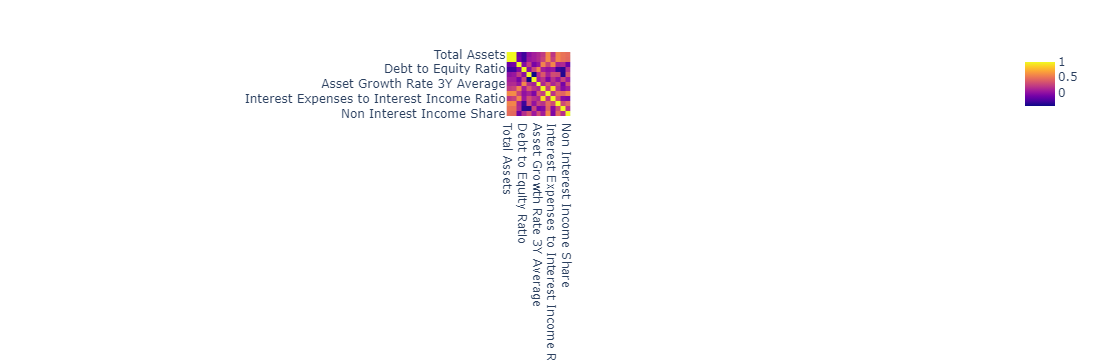

In [34]:
px.imshow(df_tot_sum.drop('Benchmark values', axis=0).corr(), text_auto=True)

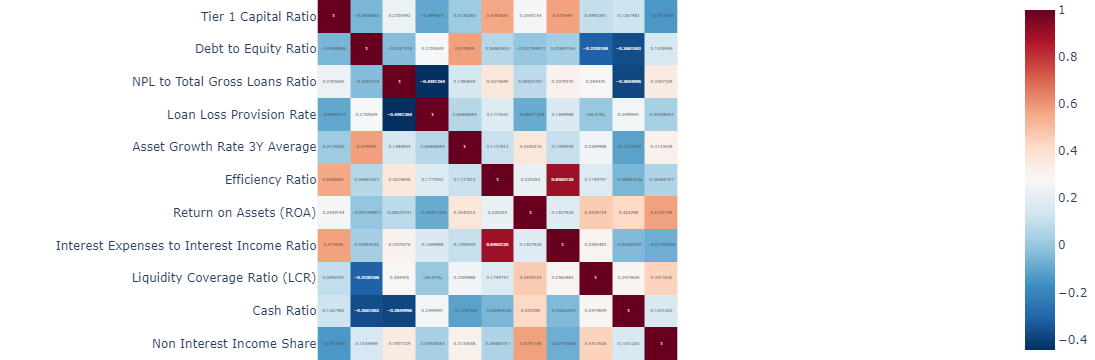

In [49]:
fig = px.imshow(df_tot_sum.drop(['Benchmark values'], axis=0).drop(['Total Assets', 'Total Gross Loans'], axis=1).corr(), text_auto=True, color_continuous_scale='RdBu_r')
fig.update_layout(
margin={"t": 0, "b": 0, "r": 0, "l": 0, "pad": 0},
)
fig.update_xaxes(dict(
        autorange=True,
        showgrid=False,
        ticks='',
        showticklabels=False
    ),)

In [20]:
n_colors = 20
color_scale_g = px.colors.sample_colorscale("blues", [n/(n_colors -1) for n in range(n_colors)])

In [24]:
color_scale_g

['rgb(247, 251, 255)',
 'rgb(236, 244, 252)',
 'rgb(226, 238, 248)',
 'rgb(216, 231, 245)',
 'rgb(206, 224, 242)',
 'rgb(194, 217, 238)',
 'rgb(177, 210, 232)',
 'rgb(160, 203, 226)',
 'rgb(139, 192, 221)',
 'rgb(118, 180, 216)',
 'rgb(98, 168, 211)',
 'rgb(81, 156, 204)',
 'rgb(64, 144, 197)',
 'rgb(50, 130, 190)',
 'rgb(36, 116, 183)',
 'rgb(25, 103, 173)',
 'rgb(15, 89, 163)',
 'rgb(8, 76, 148)',
 'rgb(8, 62, 128)',
 'rgb(8, 48, 107)']

In [17]:
n_lines = 20
cmap = mpl.colormaps['cividis']
# mpl.colormaps[]
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, n_lines))

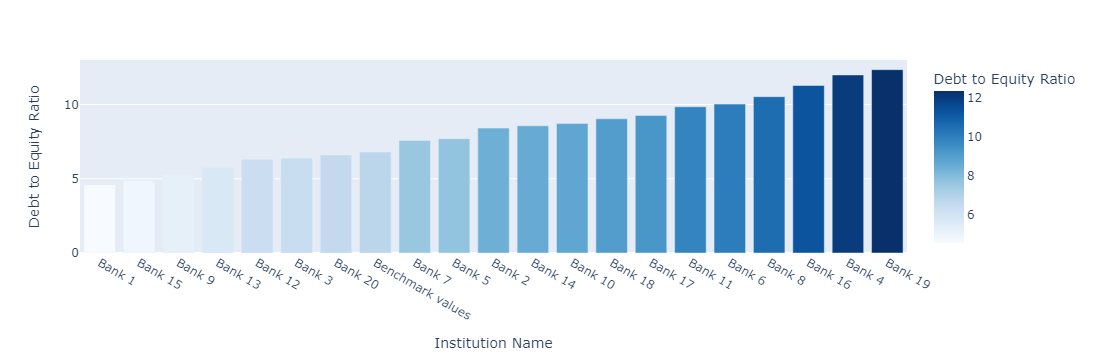

In [23]:
px.bar(data_frame=df_tot_sum.reset_index().sort_values('Debt to Equity Ratio'), 
       x='Institution Name', y='Debt to Equity Ratio', color = 'Debt to Equity Ratio', color_continuous_scale=color_scale_g)

In [87]:
list_name = df_final[df_final["Date"] == '2023-12-31'].reset_index().sort_values('Debt to Equity Ratio')['Institution Name']
# create a list of tuples using enumerate()
tuples = [(key, value)
          for i, (key, value) in enumerate(zip(list_name, colors))]

# convert list of tuples to dictionary using dict()
res = dict(tuples)

In [88]:
res

{'Bank 1': array([0.      , 0.135112, 0.304751, 1.      ]),
 'Bank 9': array([0.    , 0.1708, 0.3931, 1.    ]),
 'Bank 15': array([0.046205, 0.203903, 0.440196, 1.      ]),
 'Bank 13': array([0.154261, 0.242475, 0.43012 , 1.      ]),
 'Bank 12': array([0.217863, 0.277985, 0.424206, 1.      ]),
 'Bank 3': array([0.275513, 0.315965, 0.422979, 1.      ]),
 'Bank 20': array([0.32425 , 0.351289, 0.42625 , 1.      ]),
 'Bank 2': array([0.373884, 0.389646, 0.434209, 1.      ]),
 'Bank 18': array([0.418383, 0.425733, 0.44556 , 1.      ]),
 'Bank 14': array([0.464947, 0.465241, 0.463395, 1.      ]),
 'Bank 5': array([0.51054 , 0.502643, 0.47255 , 1.      ]),
 'Bank 7': array([0.562972, 0.543741, 0.470488, 1.      ]),
 'Bank 17': array([0.612977, 0.582861, 0.46295 , 1.      ]),
 'Bank 16': array([0.668008, 0.626171, 0.44927 , 1.      ]),
 'Bank 10': array([0.720222, 0.667618, 0.430805, 1.      ]),
 'Bank 11': array([0.777651, 0.713719, 0.404112, 1.      ]),
 'Bank 8': array([0.832192, 0.758014, 

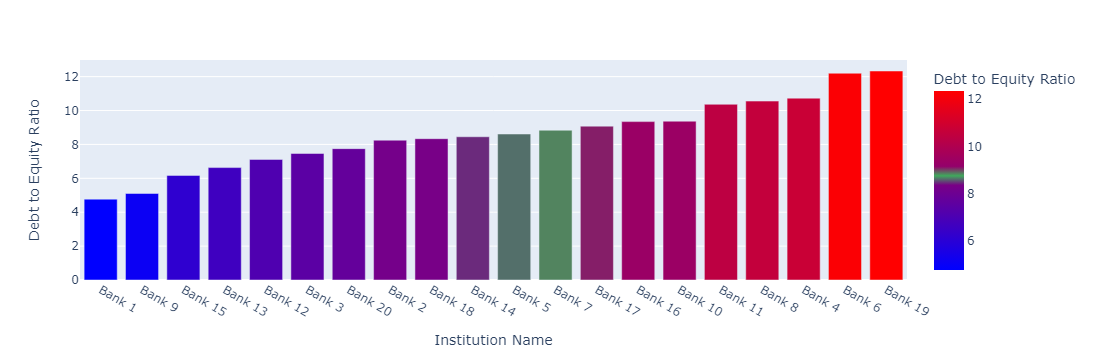

In [124]:
px.bar(data_frame=df_final[df_final["Date"] == '2023-12-31'].reset_index().sort_values('Debt to Equity Ratio'), 
       x='Institution Name', y='Debt to Equity Ratio', color = 'Debt to Equity Ratio', color_continuous_scale=color_scale)

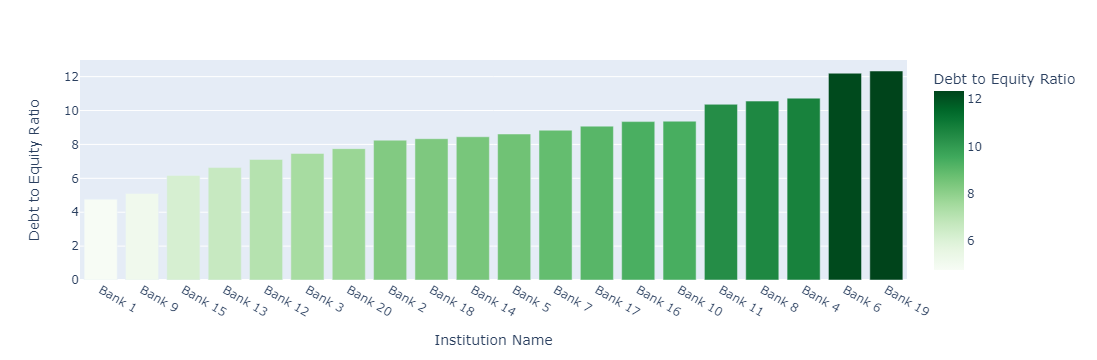

In [107]:
px.bar(data_frame=df_final[df_final["Date"] == '2023-12-31'].reset_index().sort_values('Debt to Equity Ratio'), 
       x='Institution Name', y='Debt to Equity Ratio', color = 'Debt to Equity Ratio', color_continuous_scale=color_scale_g)

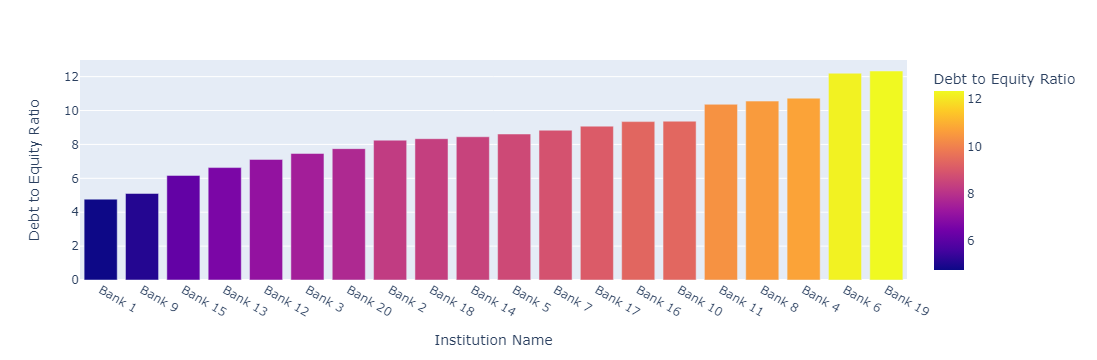

In [112]:
px.bar(data_frame=df_final[df_final["Date"] == '2023-12-31'].reset_index().sort_values('Debt to Equity Ratio'), 
       x='Institution Name', y='Debt to Equity Ratio', color = 'Debt to Equity Ratio', color_discrete_map=res)

In [70]:
colors

array([[5.03830e-02, 2.98030e-02, 5.27975e-01, 1.00000e+00],
       [1.64070e-01, 2.01710e-02, 5.77478e-01, 1.00000e+00],
       [2.54627e-01, 1.38820e-02, 6.15419e-01, 1.00000e+00],
       [3.37683e-01, 5.61800e-03, 6.43049e-01, 1.00000e+00],
       [4.17642e-01, 5.64000e-04, 6.58390e-01, 1.00000e+00],
       [4.94877e-01, 1.19900e-02, 6.57865e-01, 1.00000e+00],
       [5.62738e-01, 5.15450e-02, 6.41509e-01, 1.00000e+00],
       [6.31017e-01, 1.07699e-01, 6.08287e-01, 1.00000e+00],
       [6.92840e-01, 1.65141e-01, 5.64522e-01, 1.00000e+00],
       [7.48289e-01, 2.22711e-01, 5.16834e-01, 1.00000e+00],
       [7.98216e-01, 2.80197e-01, 4.69538e-01, 1.00000e+00],
       [8.40155e-01, 3.33580e-01, 4.27455e-01, 1.00000e+00],
       [8.81443e-01, 3.92529e-01, 3.83229e-01, 1.00000e+00],
       [9.18109e-01, 4.53603e-01, 3.39529e-01, 1.00000e+00],
       [9.49217e-01, 5.17763e-01, 2.95662e-01, 1.00000e+00],
       [9.73416e-01, 5.85761e-01, 2.51540e-01, 1.00000e+00],
       [9.88260e-01, 6.5

In [97]:
px.colors.cyclical.b

AttributeError: module '_plotly_utils.colors.sequential' has no attribute 'bluered'

In [105]:
n_colors = 20
color_scale_g = px.colors.sample_colorscale("greens", [n/(n_colors -1) for n in range(n_colors)])

In [116]:
len(color_scale_g)

20

In [114]:
color_scale[10] = 'rgb(63, 169, 92)'

In [106]:
color_scale_g

['rgb(247, 252, 245)',
 'rgb(239, 249, 236)',
 'rgb(232, 246, 227)',
 'rgb(221, 242, 216)',
 'rgb(208, 237, 202)',
 'rgb(195, 231, 188)',
 'rgb(179, 225, 173)',
 'rgb(163, 218, 157)',
 'rgb(144, 209, 141)',
 'rgb(125, 200, 126)',
 'rgb(105, 191, 113)',
 'rgb(84, 180, 102)',
 'rgb(63, 169, 92)',
 'rgb(51, 156, 82)',
 'rgb(38, 142, 72)',
 'rgb(24, 130, 61)',
 'rgb(9, 117, 51)',
 'rgb(0, 103, 41)',
 'rgb(0, 85, 34)',
 'rgb(0, 68, 27)']

In [108]:
tuples = [(key, value)
          for i, (key, value) in enumerate(zip(list_name, color_scale))]

# convert list of tuples to dictionary using dict()
res = dict(tuples)

In [110]:
res['Bank 16'] = 'rgb(63, 169, 92)'

In [111]:
res

{'Bank 1': 'rgb(0, 0, 255)',
 'Bank 9': 'rgb(13, 0, 242)',
 'Bank 15': 'rgb(27, 0, 228)',
 'Bank 13': 'rgb(40, 0, 215)',
 'Bank 12': 'rgb(54, 0, 201)',
 'Bank 3': 'rgb(67, 0, 188)',
 'Bank 20': 'rgb(81, 0, 174)',
 'Bank 2': 'rgb(94, 0, 161)',
 'Bank 18': 'rgb(107, 0, 148)',
 'Bank 14': 'rgb(121, 0, 134)',
 'Bank 5': 'rgb(134, 0, 121)',
 'Bank 7': 'rgb(148, 0, 107)',
 'Bank 17': 'rgb(161, 0, 94)',
 'Bank 16': 'rgb(63, 169, 92)',
 'Bank 10': 'rgb(188, 0, 67)',
 'Bank 11': 'rgb(201, 0, 54)',
 'Bank 8': 'rgb(215, 0, 40)',
 'Bank 4': 'rgb(228, 0, 27)',
 'Bank 6': 'rgb(242, 0, 13)',
 'Bank 19': 'rgb(255, 0, 0)'}

In [117]:
df_final

,Date,Tier 1 Capital Ratio,Debt to Equity Ratio,NPL to Total Gross Loans Ratio,Loan Loss Provision Rate Scaled,Asset Growth Rate 3Y Average,Efficiency Ratio,Return on Assets (ROA),Interest Expenses to Interest Income Ratio,Liquidity Coverage Ratio (LCR),Cash Ratio,Non Interest Income Share
Institution Name,,,,,,,,,,,,
Bank 1,2023-12-31,0.260000,4.771631,0.01,0.017149,0.077586,0.122518,0.008864,0.079970,2.100000,0.271,0.256580
Bank 2,2023-12-31,0.290000,8.250158,0.07,0.067149,0.027279,0.195481,0.013359,0.130813,2.630000,0.498,0.196549
Bank 3,2023-12-31,0.250000,7.466553,0.04,0.017149,0.071640,0.252003,0.017576,0.202613,1.820000,0.288,0.131142
Bank 4,2023-12-31,0.260000,10.730539,0.04,0.022851,0.091949,0.086661,0.010701,0.056468,1.710000,0.437,0.176374
Bank 5,2023-12-31,0.180000,8.614743,0.02,0.047149,0.144256,0.282304,0.018171,0.198455,2.770000,0.589,0.220463
Bank 6,2023-12-31,0.170000,12.201360,0.03,0.062851,0.062363,0.367695,0.012043,0.152587,1.470000,0.568,0.292571
Bank 7,2023-12-31,0.220000,8.837695,0.03,0.007149,-0.015272,0.163108,0.002452,0.120500,1.800000,0.511,0.104360
Bank 8,2023-12-31,0.200000,10.556730,0.07,0.052851,0.091112,0.052993,0.015808,0.026073,2.080000,0.163,0.183909
Bank 9,2023-12-31,0.130000,5.106592,0.02,0.027149,0.185533,0.166151,-0.020131,0.151672,1.340000,0.325,0.082389


In [121]:
df_final.index.values.tolist().index('Bank 20')

19

In [127]:
cmap = mpl.colormaps.get_cmap('Spectral')

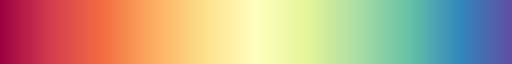

In [128]:
cmap